In [1]:
import requests
import pandas as pd


# Data

## Raw Data

In [2]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'

In [3]:
response=requests.get(query)


In [4]:
df = pd.DataFrame(response.json()['historical'])

In [5]:
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2021-09-03,49341.066406,49462.562500,48457.988281,49462.562500,49462.562500,4.080373e+10,4.080373e+10,121.49609,0.246,49127.70443,"September 03, 21",0.00246
1,2021-09-02,48807.847656,50343.421875,48652.320313,49327.722656,49327.722656,3.950807e+10,3.950807e+10,519.87500,1.065,49441.15495,"September 02, 21",0.01065
2,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10,3.913940e+10,1747.25391,3.710,48173.51823,"September 01, 21",0.03710
3,2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,"August 31, 21",0.00303
4,2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2016-09-07,610.572998,614.544983,608.513000,614.544006,614.544006,7.503240e+07,7.503240e+07,3.97101,0.650,612.53400,"September 07, 16",0.00650
1823,2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,7.852910e+07,7.852910e+07,3.92999,0.648,608.78566,"September 06, 16",0.00648
1824,2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394
1825,2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, mean_absolute_percentage_error
import math

# 3 year Data

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df_2 = df[['date', 'adjClose']]

In [9]:
date = pd.to_datetime('2018-09-01')

In [10]:
df_3years = df_2[df_2['date']>date]

In [11]:
df_3years = df_3years.set_index('date')

In [12]:
df_3years

,adjClose
date,
2021-09-03,49462.562500
2021-09-02,49327.722656
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
...,...
2018-09-06,6529.169922
2018-09-05,6792.830078
2018-09-04,7361.660156


## Time Series plot

<AxesSubplot:xlabel='date'>

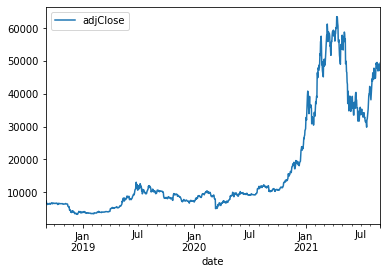

In [13]:
df_3years.plot()

# ML approach to TS

## Continuous (train ➔ test) split 

In [14]:
# 80/20 Train-test split
train_size = 0.8
index = round(train_size*df_3years.shape[0])
df_train = df_3years.iloc[:index]
df_test = df_3years.iloc[index:]

In [15]:
from sklearn.metrics import r2_score

## Test split

In [16]:
df_test

,adjClose
date,
2019-04-09,5204.958496
2019-04-08,5289.770996
2019-04-07,5198.896973
2019-04-06,5059.817383
2019-04-05,5036.681152
...,...
2018-09-06,6529.169922
2018-09-05,6792.830078
2018-09-04,7361.660156


## Train split

In [17]:
df_train

,adjClose
date,
2021-09-03,49462.562500
2021-09-02,49327.722656
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
...,...
2019-04-14,5167.722168
2019-04-13,5096.586426
2019-04-12,5089.539063


### Whatever value was in the previous time period, we use that to predict the next value. Using .shift, we shift the data by 1. 

In [18]:
y_pred = df_test.shift(1)
y_pred

,adjClose
date,
2019-04-09,NaN
2019-04-08,5204.958496
2019-04-07,5289.770996
2019-04-06,5198.896973
2019-04-05,5059.817383
...,...
2018-09-06,6467.069824
2018-09-05,6529.169922
2018-09-04,6792.830078


In [19]:
y_true = df_test[1:]

In [20]:
y_true.shape

(219, 1)

In [21]:
y_test = df_test.drop(['2019-04-08'])

In [22]:
y_test

,adjClose
date,
2019-04-09,5204.958496
2019-04-07,5198.896973
2019-04-06,5059.817383
2019-04-05,5036.681152
2019-04-04,4922.798828
...,...
2018-09-06,6529.169922
2018-09-05,6792.830078
2018-09-04,7361.660156


### Very good R2 score.

In [23]:
y_pred = df_test.shift(1).dropna()
print(f"R2:{r2_score(y_true, y_pred)}")

R2:0.9865577642943877


In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print('MSE =', round(mse, 2))
print('MAE =', round(mae, 2))
print('MAPE =', round(mape, 2))

MSE = 22039.27
MAE = 86.57
MAPE = 0.02


#### Taking a years worth of historic features to predict the current value with 12 auto-regressive features

In [25]:
df2 = df_3years.copy()
df2_train = df_train.copy() 
df2_test = df_test.copy()

for i in range(1, 13):
    df2_train[f't - {i}'] = df_train['adjClose'].shift(i)
    df2_test[f't - {i}'] = df_test['adjClose'].shift(i)

df2_train.dropna(inplace=True)    
df2_test.dropna(inplace=True)    
df2_train.head()

,adjClose,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12
date,,,,,,,,,,,,,
2021-08-22,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,47054.984375,47166.687500,48847.027344,49327.722656,49462.562500
2021-08-21,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,47054.984375,47166.687500,48847.027344,49327.722656
2021-08-20,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,47054.984375,47166.687500,48847.027344
2021-08-19,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,47054.984375,47166.687500
2021-08-18,44801.187500,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,47054.984375


In [26]:
# Train Test Split
X2_train = df2_train.drop(columns = ['adjClose'])
y2_train = df2_train['adjClose']
X2_test = df2_test.drop(columns = ['adjClose'])
y2_test = df2_test['adjClose']

print(X2_train.shape,y2_train.shape, X2_test.shape,y2_test.shape)

(866, 12) (866,) (208, 12) (208,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [28]:
import matplotlib.pyplot as plt

R2:  0.9883351993054952


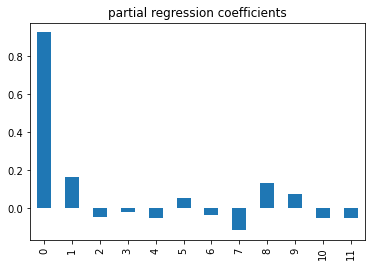

In [29]:
model = LinearRegression()
model = model.fit(X2_train, y2_train)

print('R2: ', r2_score(y2_test, model.predict(X2_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

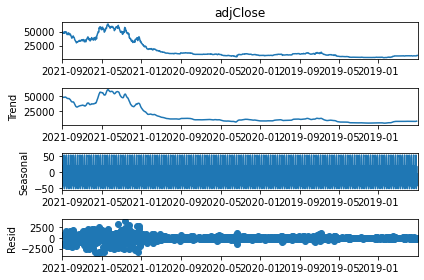

In [31]:
# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(df_3years['adjClose'], model='additive')
result_add.plot();

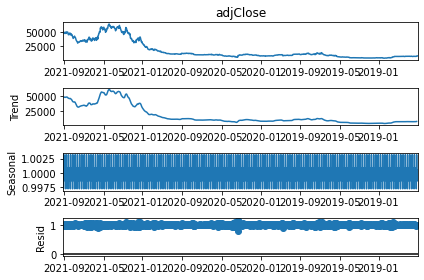

In [32]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mul = seasonal_decompose(df_3years['adjClose'], model='multiplicative')
result_mul.plot();

## Remove essence of time for our modelling, so that we have our residuals which cannot explain at the time.

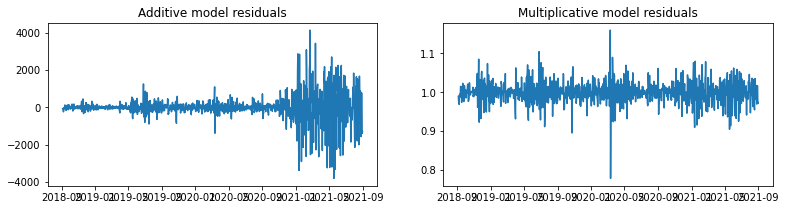

In [33]:
# Plot the residuals with "result_add.resid" to decide
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive model residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative model residuals");

In [34]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_3years.adjClose)[1]

0.2779853847729158

In [35]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multipl resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  1.2181219601406305e-23
multipl resid:  3.636949511332272e-19


In [36]:
from statsmodels.graphics.tsaplots import plot_acf

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf

## Monthly seasonality, as lags peak around 30th day (Slow exponential decrease)

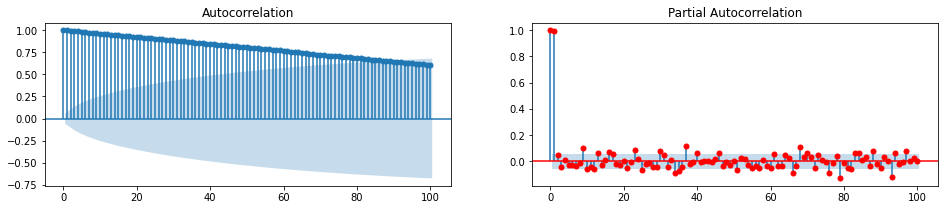

In [38]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(df_3years.adjClose, lags=100, ax=axes[0]);
plot_pacf(df_3years.adjClose, lags=100, ax=axes[1], color='r');

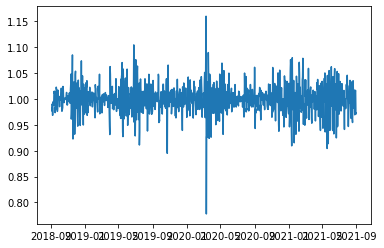

In [39]:
plt.plot(result_mul.resid)

<AxesSubplot:ylabel='Density'>

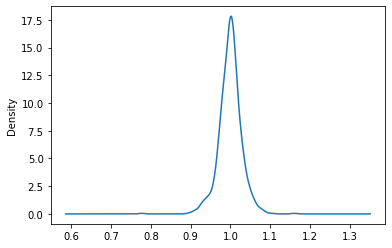

In [40]:
result_mul.resid.plot(kind='kde')

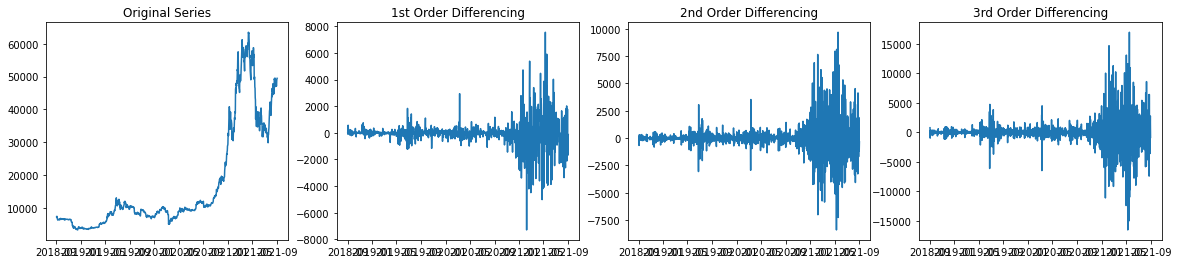

In [41]:
zero_diff = df_3years.adjClose
first_order_diff = df_3years.adjClose.diff(1)
second_order_diff = df_3years.adjClose.diff(1).diff(1)
third_order_diff = df_3years.adjClose.diff(1).diff(1).diff(1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing')
ax4.plot(third_order_diff); ax4.set_title('3rd Order Differencing');

In [42]:
print('p-value zero-diff: ', adfuller(df_3years['adjClose'])[1])
print('p-value first-diff: ', adfuller(df_3years['adjClose'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(df_3years['adjClose'].diff().diff().dropna())[1])

p-value zero-diff:  0.2779853847729158
p-value first-diff:  3.4848166457290054e-16
p-value second-diff:  4.275280808478322e-22


In [43]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_3years['adjClose'])

1

In [44]:
y_diff = first_order_diff.dropna()

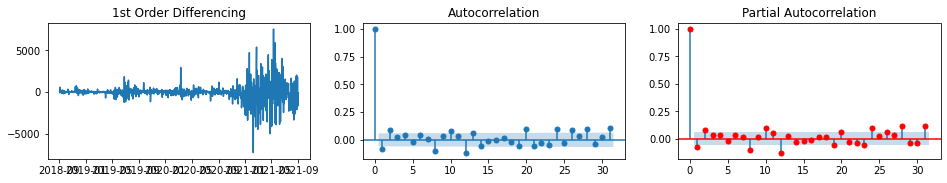

In [45]:
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_diff); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff, ax=axes[1]);
plot_pacf(y_diff, ax=axes[2], c='r');